# Numerical Methods

# 2022/23 Class Assessment

## Wednesday 10th May 2023

## 10:00 - 13:00

## Test instructions


* This test contains **FIVE** questions with multiple parts, **all** of which should be answered.



* Write your solution in *markdown* (text and equations) and *code* (Python) cells under each question.



* [You may if you choose also submit parts of your answers via **scans of hand written pages** - feel free to use this option in particular for supplementary sketches or equations, you will not be marked down for not embedding equations into your markdown cells. But please make sure that the question number each sheet you scan refers to is very clear and ideally include in the file name.]



* You should provide an explanation of your solution as comments in your code and in the surrounding markdown cells as appropriate to answer the question and explain your steps.



* **Unless explicitly told otherwise in the question you can reuse any code from the lectures and homeworks, you can also use any calls to standard libraries (e.g. NumPy, SciPy)**. 



* **Save your work regularly**


* At the end of the test you should **Save/download your Jupyter notebook** (i.e. the file with a .ipynb extension), and **email your Jupyter notebook document**  and any **scans of hand written sheets** to [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott) at <mailto:m.d.piggott@imperial.ac.uk>.



* If there are any issues during the assessment period **please document these**, e.g. via photos, and as soon as possible email <mailto:m.d.piggott@imperial.ac.uk> to report the problem.



* If your email attachments together are too large to send then please use one drive

In [1]:
# you may import any libraries we used in lectures, e.g.

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.interpolate as si
import scipy.integrate as integrate
import scipy.linalg as sl
import scipy.optimize as sop

### Question 1 - interpolation and curve-fitting [20 marks]


<br>

**1.1 [4 marks]**

Consider a data set made up of 5 $(x,y)$ data points of your choosing.

Explain how you know mathematically before making any calculations what degree polynomial can be used to exactly interpolate this data. 

<br>

**1.2 [5 marks]**

Write some code to compute and plot the Lagrange interpolating polynomial for your data from above.

Check what degree of polynomial interpolates your data. Does this agree with your answer to the previous question?

<br>


**1.3 [5 marks]**

Now consider least squares polynomial curve-fitting of your five data points, i.e. consider lower degree polynomials that approximate your data to an extent, but that don't necessarily go through all data points. 

Demonstrate how as you increase the degree of the polynomial, the error in your approximation of the data decreases.

<br>

**1.4 [6 marks]**

Now consider a cloud (of at least 10) $(x,y)$ data points of your choosing. 

Construct such a cloud of data points such that a linear polynomial approximates the data in a way that a higher-degree polynomial is largely unable to beat. 

What is meant by this is that the least squares error is non-zero when using a linear polynomial (as we're curve-fitting), but that it drops minimally, if at all, as the degree of the approximating polynomial increases, i.e. you have no need to use more than a linear approximation.

Now repeat by constructing a cloud of data points for which a quadratic approximation is hard to beat, i.e. a quadratic approximation gives a much better approximation than a linear, but again there is little point going to a higher degree approximation.


In [2]:
def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()

xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])
print("Number of points to fit: ", np.size(xi))
# in this example we have 6 pieces of information, to fit a polynomial
# that exactly goes through these points we need 6 unknowns, or free 
# parameters, to choose in the polynomial.  [Too few and we won't be able
# to fit the data exaclty, and too many would just be a waste.  Cf. over-
# and under-determined systems.]
# A 5th order polynomial has 6 free parameters (all the powers up to 5,
# including 0).
# So calling polyfit to fit a polynomial of degree 5 (size(x)-1) should
# fit the data exactly (repeat below with size(x)-2 etc, and size(x) and 
# above to convince yourself of this).
# Let's check the errors up to this point:



# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

# and now compute the errors
for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}'.format(i, sqr_error(p, xi, yi)))
    


Number of points to fit:  6
poly_coeffs = 
[[ 0.5         0.          0.          0.          0.          0.        ]
 [ 0.0508044   0.26714649  0.          0.          0.          0.        ]
 [ 0.02013603 -0.13983999  0.55279339  0.          0.          0.        ]
 [-0.00552147  0.09889271 -0.43193108  0.75909819  0.          0.        ]
 [-0.00420655  0.07403681 -0.38492428  0.59251888  0.27906056  0.        ]
 [-0.00301599  0.06536037 -0.49614427  1.59623195 -2.08266478  1.20030166]]
square of the difference between the data and the polynomial of degree 0 = 4.60000000e-01
square of the difference between the data and the polynomial of degree 1 = 3.32988992e-01
square of the difference between the data and the polynomial of degree 2 = 1.99478242e-01
square of the difference between the data and the polynomial of degree 3 = 1.57303437e-01
square of the difference between the data and the polynomial of degree 4 = 4.69232378e-02
square of the difference between the data and the polyno

In [3]:
# create the polynomials using code from the lecture

# consider the above example data again
xi=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

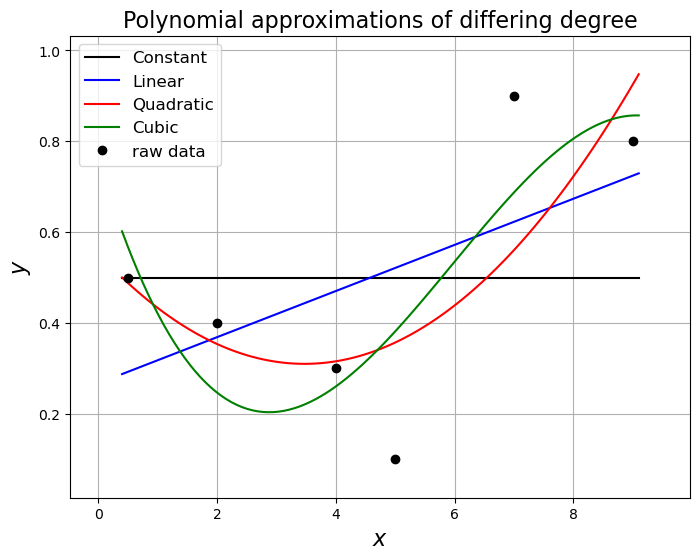

In [4]:
# and plot again
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

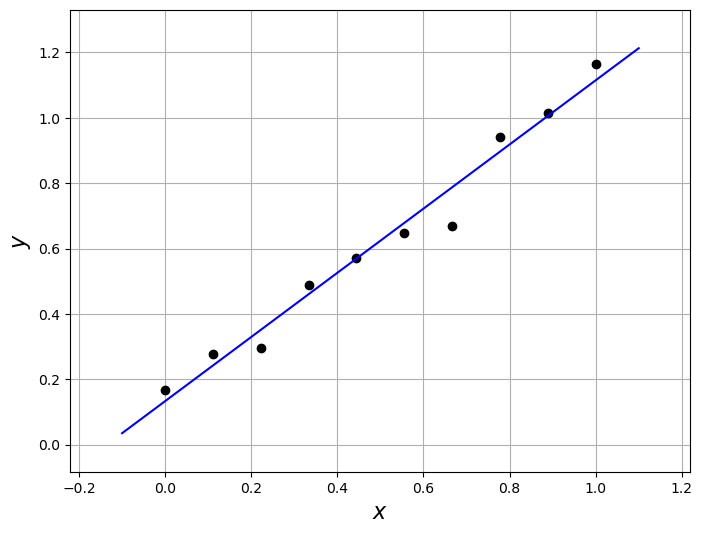

In [5]:

xi = np.linspace(0, 1, 10)

yi = xi + 0.2*np.random.rand(10)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot raw data
plot_raw_data(xi, yi, ax1)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

x = np.linspace(-0.1, 1.1, 100)
ax1.plot(x, p1(x), 'b', label='Linear')

In [6]:
N = np.shape(xi)[0]

poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

# and now compute the errors
for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}'.format(i, sqr_error(p, xi, yi)))
    

poly_coeffs = 
[[ 6.24013172e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.81441553e-01  1.33292395e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.02753207e-01  6.78688346e-01  1.78144722e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.22102790e-01 -1.80400978e-01  8.62008576e-01  1.67010305e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.32878653e-02  3.88678521e-01 -2.21908069e-01  8.70227802e-01
   1.66791125e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.58351125e+00  2.39254903e+01 -2.05136300e+01  7.17277654e+00
  -1.68909043e-02  1.76528982e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 

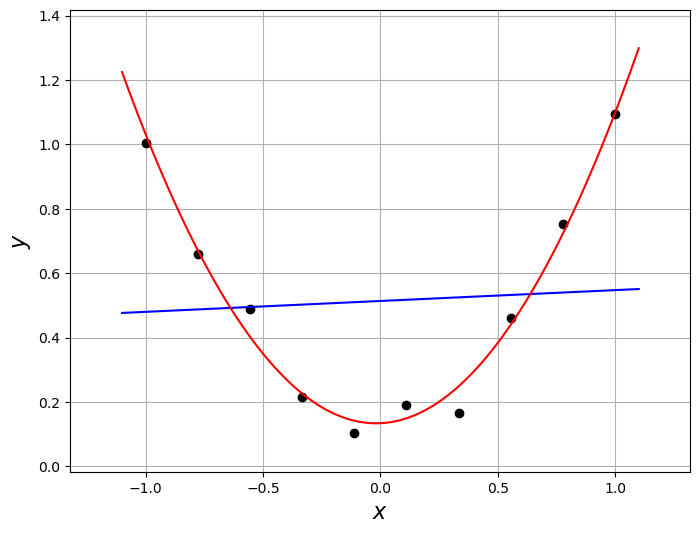

In [7]:

xi = np.linspace(-1, 1, 10)

yi = xi**2 + 0.2*np.random.rand(10)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot raw data
plot_raw_data(xi, yi, ax1)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)
# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

x = np.linspace(-1.1, 1.1, 100)
ax1.plot(x, p1(x), 'b', label='Linear')

ax1.plot(x, p2(x), 'r', label='Quadratic')

In [8]:
N = np.shape(xi)[0]

poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

# and now compute the errors
for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}'.format(i, sqr_error(p, xi, yi)))
    

poly_coeffs = 
[[ 5.13531653e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.37418474e-02  5.13531653e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.31955416e-01  3.37418474e-02  1.33846113e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.18310793e-02  9.31955416e-01 -1.82248347e-02  1.33846113e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.78117403e-01  7.18310793e-02  1.11227180e+00 -1.82248347e-02
   1.12882501e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.90022639e-01 -1.78117403e-01  3.14246792e-01  1.11227180e+00
  -7.67965643e-02  1.12882501e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 

### Question 2 - numerical solution of ODEs  [20 marks]

<br>

**1.1 [10 marks]**

Consider the ODE problem in the form

$$ \frac{du}{dt} = u, \;\;\;\;\;\; u(0) = 1, $$ 

which has the exact solution $u(t) = \exp(t)$.

<br>

The forward Euler method for this ODE in this form is given by

$$ u(t+\Delta t) = u(t)+ \Delta t u(t).$$

<br>

Heun's method applied to this ODE is given by

$$ u(t+\Delta t) = u(t)+\frac{\Delta t}{2}\big(u(t) + \tilde{u}(t+\Delta t)\big),$$

where we use a forward Euler step at each time step level to find the $\tilde{u}(t+\Delta t)$ that appears in the above expression:

$$ \tilde{u}(t+\Delta t)=u(t)+\Delta t u(t). $$

<br>

Write functions to implement these two time-stepping methods and by solving the given ODE problem from $t=0$ up to $t=5$ verify your implementations by performing a convergence analysis against the exact solution.

<br>

**Note that you may NOT make use of the exact solution in your implementations, i.e. you cannot replace the given ODE** $u'=u$ **with** $u'=\exp(t)$, **for the purposes of your code.**

<br>

**1.2 [10 marks]**

Now consider the backward Euler method applied to this ODE, which can be written

$$ u(t+\Delta t) = u(t) + \Delta t u(t+\Delta t)$$

An issue with a straightforward code implementation here is that we have the unknown value $u(t+\Delta t)$ on both the left hand and the right hand sides of this equation.

Consider how you can manipulate or rearrange this expression on paper in order to construct an expression that allows you to calculate $u(t+\Delta t)$ using only information on the right hand side that is known.

Write a function to implement this time stepping method making use of this manipulation and verify your implementation using the same approach as in the first part of this question.

<br>

<br>

Heun's method from the first part of this question is also known as the *explicit* trapezoidal method. 

The *implicit* trapezoidal method is given by 

$$ u(t+\Delta t) = u(t)+\frac{\Delta t}{2}\big(u(t) + u(t+\Delta t)\big)$$

and does not use the Heun or explicit trapezoidal "trick" of computing a guess ($\tilde{u}$) at the solution at the new time level.

Using the same manipulation approach that allows you to construct a backward Euler solver for this ODE, construct an implicit trapezoidal solver. Verify your method.

<br>

<br>


Compare the errors between all four implemented methods.


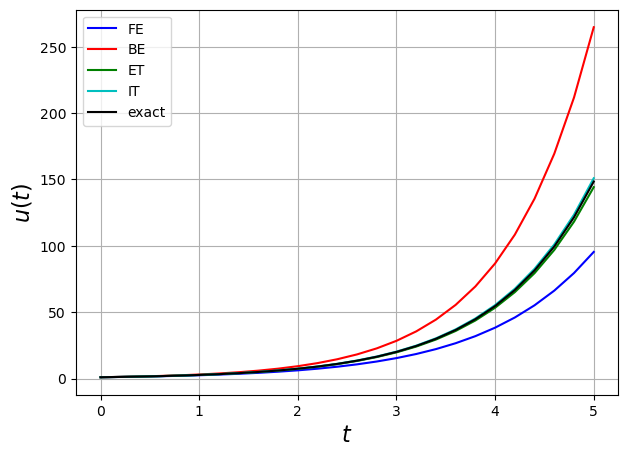

In [9]:
def FE(u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + dt*u
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def BE(u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u/(1-dt)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

# Heun
def ET(u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + dt*u # euler guess
        u = u + 0.5*dt*(u + ue)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def IT(u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u*(1+dt/2)/(1-dt/2)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

dt = 0.2
u0 = 1.0
t0 = 0.0
tf = 5.0

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

(u_all,t_all) = FE(u0,t0,tf,dt)
ax1.plot(t_all, u_all,'b',label='FE')

(u_all,t_all) = BE(u0,t0,tf,dt)
ax1.plot(t_all, u_all,'r',label='BE')

(u_all,t_all) = ET(u0,t0,tf,dt)
ax1.plot(t_all, u_all,'g',label='ET')

(u_all,t_all) = IT(u0,t0,tf,dt)
ax1.plot(t_all, u_all,'c',label='IT')

# exact solution
ax1.plot(t_all, np.exp(t_all),'k',label='exact')

ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$u(t)$', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best')

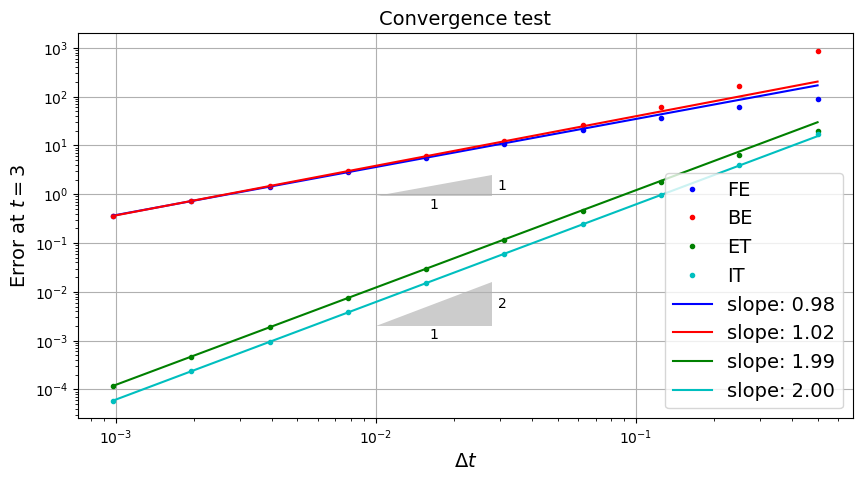

In [10]:
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# problem parameters
t0 = 0.0
u0 = 1.0
t_max = 5.

def approx_error(dt, t_max):
    (u_all,t_all) = FE(u0,t0,tf,dt)
    err1 = abs(u_all[-1] - np.exp(5))
    (u_all,t_all) = BE(u0,t0,tf,dt)
    err2 = abs(u_all[-1] - np.exp(5))
    (u_all,t_all) = ET(u0,t0,tf,dt)
    err3 = abs(u_all[-1] - np.exp(5))
    (u_all,t_all) = IT(u0,t0,tf,dt)
    err4 = abs(u_all[-1] - np.exp(5))
    return err1, err2, err3, err4


error_FE = []
error_BE = []
error_ET = []
error_IT = []
dt_array = []

dt = 0.5
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3, err4 = approx_error(dt, t_max)
    error_FE.append(err1)
    error_BE.append(err2)
    error_ET.append(err3)
    error_IT.append(err4)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_FE, 'b.', label='FE')
ax1.loglog(dt_array, error_BE, 'r.', label='BE')
ax1.loglog(dt_array, error_ET, 'g.', label='ET')
ax1.loglog(dt_array, error_IT, 'c.', label='IT')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence test', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_FE = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_FE[start_fit:]), 1)
line_fit_BE = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_BE[start_fit:]), 1)
line_fit_ET = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ET[start_fit:]), 1)
line_fit_IT = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_IT[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_FE[1]) * dt_array**(line_fit_FE[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_FE[0]))
ax1.loglog(dt_array, np.exp(line_fit_BE[1]) * dt_array**(line_fit_BE[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_BE[0]))
ax1.loglog(dt_array, np.exp(line_fit_ET[1]) * dt_array**(line_fit_ET[0]), 'g-', label = 'slope: {:.2f}'.format(line_fit_ET[0]))
ax1.loglog(dt_array, np.exp(line_fit_IT[1]) * dt_array**(line_fit_IT[0]), 'c-', label = 'slope: {:.2f}'.format(line_fit_IT[0]))

annotation.slope_marker((1e-2, 9e-1), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((1e-2, 2e-3), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best', fontsize=14)

So we see that we have constructed two 1st order and 2 2nd order methods, with IT being the most accurate.

### Question 3 - integration/quadrature [20 marks]

<br>

Consider the following function

\begin{equation}
f(x) = \cos(x)
\end{equation}

where our aim is to accurately compute the integral 

$$I = \int_{0}^{\pi/2} f(x)\, dx $$

**3.1 [5 marks]**

Compute the exact value of the integral analytically, and also use a trusted quadrature method implementation to find a very accurate numerical approximation to it.

<br>

**[For the purpose the following questions, you should find that the value of the integral is 1.0]**

<br>

**3.2 [7 marks]**

Write a single function that performs numerical integration using (1) the Midpoint rule, (2) the Trapezoid rule, (3) Simpson's rule and (4) Weddle's rule. 

Provide the user with the ability to control which rule is used using an argument passed into the function. Demonstrate that you can use this function to provide 4 different approximate values for the integral to the given problem.

<br>

**3.3 [8 marks]**

Use your function to perform a convergence analysis of all 4 methods.


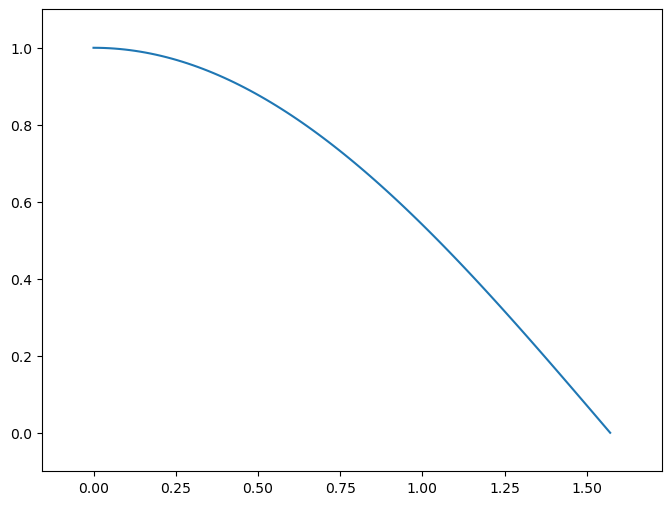

In [11]:

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
x = np.linspace(0, np.pi/2, 100)
ax1.plot(x, np.cos(x))


In [12]:
# define out problem
def f(x):
    return np.cos(x)

xl = 0
xr = np.pi/2

# and use Simpson with increasing number of points to compute true solution
for interval_sizes in [2**i for i in range(17)]:
    xx = np.linspace(xl, xr, interval_sizes+1)
    print(interval_sizes, integrate.simps(f(xx), xx) )
    
true_int = integrate.simps(f(xx), xx)

1 0.7853981633974483
2 1.0022798774922104
4 1.0001345849741938
8 1.0000082955239677
16 1.0000005166847064
32 1.000000032265001
64 1.0000000020161288
128 1.0000000001260014
256 1.000000000007875
512 1.0000000000004923
1024 1.0000000000000306
2048 1.000000000000002
4096 1.0000000000000002
8192 0.9999999999999999
16384 1.0
32768 1.0
65536 1.0


In [13]:
# cheating a bit here by using this func for weddle
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

def our_integration_function(a, b, function, number_intervals=10, rule=1):
    if rule==1: # midpoint
        interval_size = (b - a)/number_intervals
        I_M = 0.0
        mid = a + (interval_size/2.0)
        while (mid < b):
            I_M += interval_size * function(mid)
            mid += interval_size
        return I_M
    elif (rule==2):   # trap
        interval_size = (b - a)/number_intervals
        I_T = 0.0
        for i in range(number_intervals):
            this_bin_start = a + (interval_size * i)
            I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0
        return I_T
    elif (rule==3):   # simp
        interval_size = (b - a)/number_intervals
        I_S = 0.0
        for i in range(number_intervals):
            this_bin_start = a + interval_size * (i)
            this_bin_mid = this_bin_start + interval_size/2
            this_bin_end = this_bin_start + interval_size
            I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))
        return I_S
    elif (rule==4):   # weddle
        S = simpsons_composite_rule(a, b, function, number_intervals)
        S2 = simpsons_composite_rule(a, b, function, number_intervals*2)
        return S2 + (S2 - S)/15.

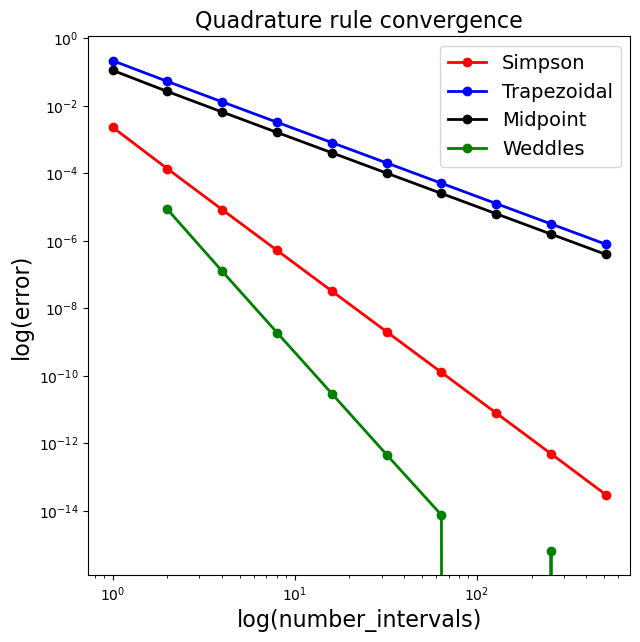

In [14]:
interval_sizes_M = [2**i for i in range(10)]
interval_sizes_T = [2**i for i in range(10)]
interval_sizes_S = [2**i for i in range(10)]
interval_sizes_W = [2**i for i in range(10)]
# due to need for even number of intervals lose the first
interval_sizes_W = interval_sizes_W[1:]

errors_M = np.zeros_like(interval_sizes_M, dtype='float64')
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
errors_W = np.zeros_like(interval_sizes_W, dtype='float64')

areas_M = np.zeros_like(interval_sizes_M, dtype='float64')
areas_T = np.zeros_like(interval_sizes_T, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_W = np.zeros_like(interval_sizes_W, dtype='float64')

for (i, number_intervals) in enumerate(interval_sizes_M):
    areas_M[i] = our_integration_function(xl, xr, f, number_intervals, 1)
    errors_M[i] = abs(areas_M[i] - true_int)

for (i, number_intervals) in enumerate(interval_sizes_T):
    areas_T[i] = our_integration_function(xl, xr, f, number_intervals, 2)
    errors_T[i] = abs(areas_T[i] - true_int)    
    
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = our_integration_function(xl, xr, f, number_intervals, 3)
    errors_S[i] = abs(areas_S[i] - true_int)

for (i, number_intervals) in enumerate(interval_sizes_W):
    areas_W[i] = our_integration_function(xl, xr, f, number_intervals, 4)
    errors_W[i] = abs(areas_W[i] - true_int)   
    

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.loglog(interval_sizes_W, errors_W, 'go-', lw=2, label='Weddles')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)


### Question 4 - root-finding [20 marks]

<br>

Consider the cubic function

$$f(x) = a x^3 + bx^2 + cx + d$$

with parameters $a$, $b$, $c$ and $d$.

<br>
<br>

**4.1 [8 marks]**

Write a function to evaluate this cubic function.

Plot this function for some representative $a$, $b$, $c$ and $d$ values of your choosing which visually demonstrate the existence of a singe root, and other choices for $a$, $b$, $c$ and $d$ values for which this function has 3 roots.


In both cases apply root bracketing to find the location of the roots to within a sub-interval size of 0.1.


<br>

**4.2 [8 marks]**

Write an additional function to evaluate the derivative of $f(x)$ and use it with Newton's method to find the roots in both cases from part 1. Make sure you use a full Newton method rather than a quasi-Newton method, i.e. that your derivative information is used.

<br>

**4.3 [4 marks]**

Explain how Newton's method can fail (either through converging to a root not closest to our starting guess, or through overflow errors) and demonstrate these scenarios using this cubic function example $f$ function.


-0.19843721453862295
Bracket =  (-0.20000000000000015, -0.10000000000000014)


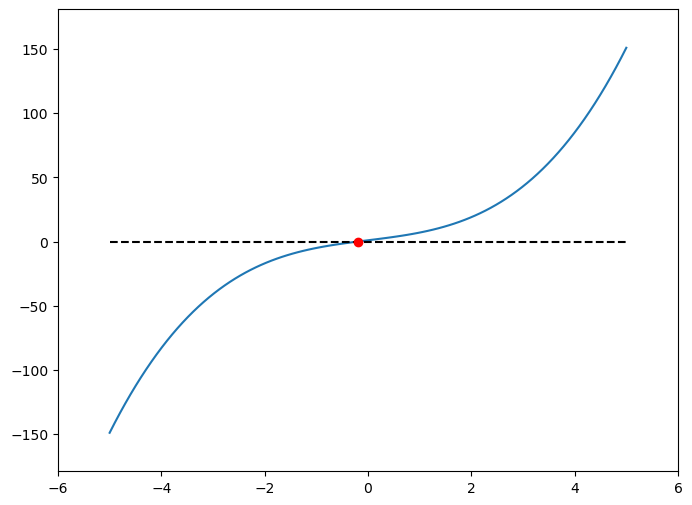

In [15]:
a = 1
b = 0
c = 5
d = 1

def f(x):
    return a*x**3 + b*x**2 + c*x + d

def dfdx(x):
    return 3*a*x**2 + 2*b*x + c


x0 = 0 # initial guess
xp1 = sop.newton(f, x0, dfdx)
print(sop.newton(f, x0, dfdx))

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
x = np.linspace(-5, 5, 100)
ax1.plot(x, f(x))
ax1.plot(x,np.zeros_like(x),'k--')
ax1.plot(xp1, 0, 'ro')

def root_bracketing(f, a, b, dx):
    """ Function to perform root bracketing on the function f(.)
    between a and b, with fixed interval size dx.
    Returns the bracket of size dx that contains the root.
    """ 
    # The sign function returns:  -1 if x < 0;  0 if x==0;  1 if x > 0.
    sign = np.sign(f(a))
    while sign == np.sign(f(a)):
        a += dx
        if a >= b:
            raise RuntimeError('no root within [a,b]')
    return (a-dx, a)

l = -1
r = 1
dx = 0.1
# print out the output from our root_bracketing function
print('Bracket = ', root_bracketing(f, l, r, dx))


0.10112606446831283


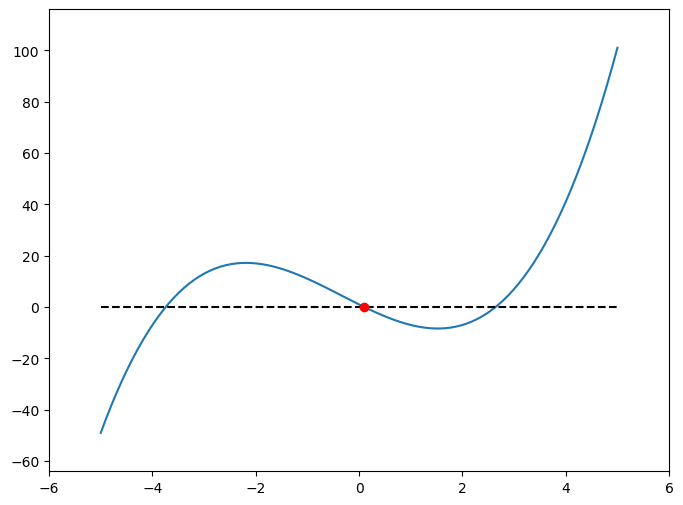

In [16]:
a = 1
b = 1
c = -10
d = 1

def f(x):
    return a*x**3 + b*x**2 + c*x + d

def dfdx(x):
    return 3*a*x**2 + 2*b*x + c


x0 = 0 # initial guess
xp1 = sop.newton(f, x0, dfdx)
print(sop.newton(f, x0, dfdx))

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
x = np.linspace(-5, 5, 100)
ax1.plot(x, f(x))
ax1.plot(x,np.zeros_like(x),'k--')
ax1.plot(xp1, 0, 'ro')


In [17]:
l = -1
r = 1
dx = 0.1
# print out the output from our root_bracketing function
print('Bracket = ', root_bracketing(f, l, r, dx))

l = -5
r = -2
dx = 0.1
# print out the output from our root_bracketing function
print('Bracket = ', root_bracketing(f, l, r, dx))

l = 2
r = 4
dx = 0.1
# print out the output from our root_bracketing function
print('Bracket = ', root_bracketing(f, l, r, dx))

Bracket =  (0.09999999999999987, 0.19999999999999987)
Bracket =  (-3.8000000000000034, -3.7000000000000033)
Bracket =  (2.6000000000000005, 2.7000000000000006)


0.10112606446831283
-3.743017747195624
2.6418916827273113


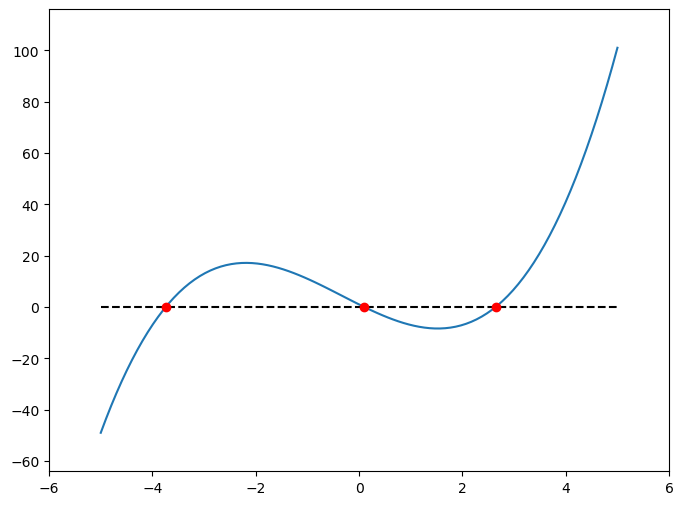

In [18]:
# now find other roots

x0 = 0 # initial guess
xp1 = sop.newton(f, x0, dfdx)
print(xp1)

x0 = -4 # initial guess
xp2 = sop.newton(f, x0, dfdx)
print(xp2)

x0 = 4 # initial guess
xp3 = sop.newton(f, x0, dfdx)
print(xp3)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
x = np.linspace(-5, 5, 100)
ax1.plot(x, f(x))
ax1.plot(x,np.zeros_like(x),'k--')
ax1.plot(xp1, 0, 'ro')
ax1.plot(xp2, 0, 'ro')
ax1.plot(xp3, 0, 'ro')

In [19]:
# not converging to the nearest root the starting point
x0 = -2 # initial guess
print(sop.newton(f, x0, dfdx))

2.6418916827273113


In [20]:
# overflow - trick here is to compute a root of dfdx to find the x location where f is flat!

# find place where function is flat using quasi-Newton
x0 = -2 # initial guess
print(sop.newton(dfdx, x0))

-2.1892547876100075


In [21]:
# now try Newton starting from (near) this value

x0 = -2.18925478 # initial guess
print(sop.newton(f, x0, dfdx))

RuntimeError: Failed to converge after 50 iterations, value is 2.641891682756689.

### Question 5 - numerical linear algebra [20 marks]

<br>

Consider a $3 \times 3$ linear system

$$A\pmb{x} = \pmb{b}$$

of your choosing representing a system of 3 linear equations for 3 unknowns.

Make sure your choice has a unique solution, i.e. that your matrix has non-zero determinant, and that it is non-trivial, i.e. the matrix is non-diagonal and the RHS vector is non-zero.

<br>

**5.1 [8 marks]**

Form the corresponding augmented system $[A|\pmb{b}]$ and perform row operations until you transform the system to upper-triangular form, find the solution using back substitution (**do this "by hand"**).

Check your answer using any method available to you to solve this problem in SciPy or NumPy.

<br>


**5.2 [12 marks]**

Now consider the Gaussian Elimination algorithm which involves the two steps: (1) transformation of the augmented matrix into upper triangular form, followed by (2) the use of back-substitution to find the solution.

Provide a mathematical description of the underlying algorithm and link this in a clear step by step manner with a corresponding code implementation.

Imagine you are giving a detailed description of Gaussian Elimination to someone who has never seen a mathematical description of the algorithm or an implementation in code before - how would you go about explaining what the maths and the code are doing in the clearest and most complete way possible?
